No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro e numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred_i} = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$y_{pred} = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $y_{pred}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - y_{pred_i})x_i$$
$$b_i = b_i + \lambda(y_i - y_{pred_i})$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Repare que $y_i - y_{pred_i}$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($y_{pred_i}$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = y_{pred_i}$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - y_{pred_i} = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq y_{pred_i}$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - y_{pred_i}$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $y_{pred_i} = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $y_{pred_i} = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w_i$ e o bias _$b$
2. Para cada amostra $(x_i, y_i)$ do nosso banco:
    1. Calcule $y_{pred_i} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_i - y_{pred_i}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado pelo usuário
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([[0, 0, 0, 1]]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4, 1)


### Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_i, y_i in zip(x, y):
        # insira seu código aqui!
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

### Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    cost = 0
    for x_i, y_i in zip(x, y):
        # insira seu código aqui!
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

## Exercício de Classificação

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

    y_mesh = np.dot(x_mesh, w.T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, np.array(w), b)

### Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(51):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para regressão em Python e Numpy:

In [ ]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

In [ ]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
print(x.shape, y.shape)

In [ ]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

### Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. __Por que elas devem ser diferentes?__

In [ ]:
D = x.shape[1]
w = 2*random() - 1 # [1xD]
b = 2*random() - 1 # [1x1]

for step in range(10001):
    cost = 0
    # qual linha devemos remover para transformar o Perceptron num regressor?
    for x_i, y_i in zip(x, y): 
        y_pred = x_i*w + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = w + 1.0*error*x_i 
        b = b + 1.0*error     
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

### Numpy 

In [3]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(10001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred 
        w = w + 1.0*np.dot(error.T, x_i)
        b = b + 1.0*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: [[1.50243337]]
step 1000: [[1000778.4382198]]
step 2000: [[4001554.72571249]]
step 3000: [[9002331.01320518]]
step 4000: [[16003107.30069787]]
step 5000: [[25003883.58819056]]
step 6000: [[36004659.87568325]]
step 7000: [[49005436.16317593]]
step 8000: [[64006212.45066863]]
step 9000: [[81006988.7381613]]
step 10000: [[1.00007765e+08]]
w:  [[10001.39302706  5001.19163022]]
b:  [[-4999.20139684]]


### Numpy com Pré-processamento

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

In [ ]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

## Exercício de Regressão

In [4]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


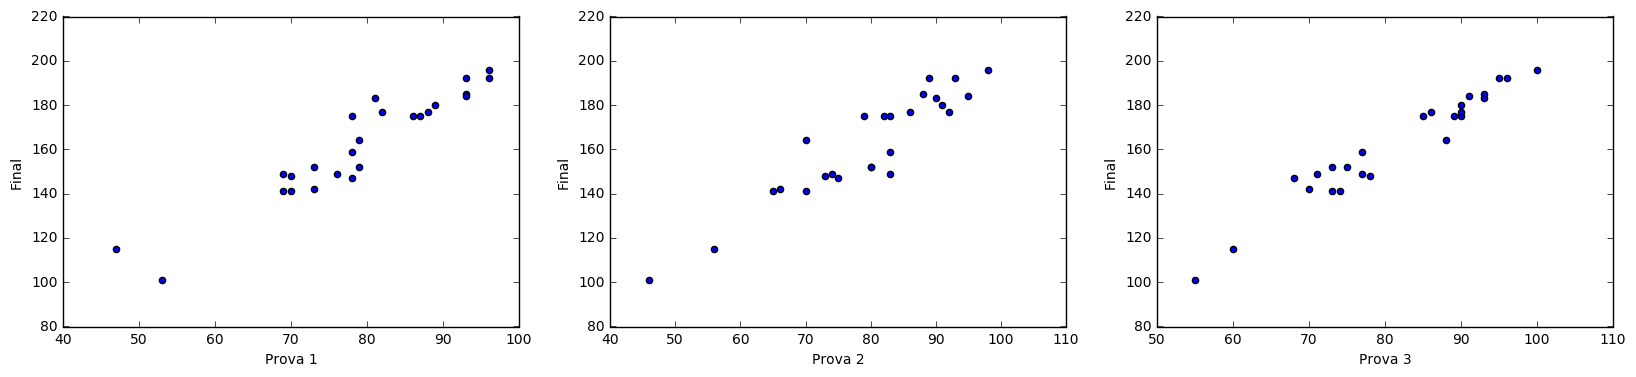

In [5]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [6]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [7]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [8]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[ 8.72048636 14.1054877  26.26749487]]
b:  [150.65175754]


/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for d in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(2001):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

### Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1.0 # <- use a mesma learning_rate do python

for step in range(2001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)